# Environmetal sound classification


## Loading the data

In [2]:
import os
import shutil
import urllib
import zipfile
import glob
import urllib.request

def download_dataset(name):
    if not os.path.exists(f'./data'):
        os.mkdir('data')
    os.chdir('./data')
    """Download the dataset into current working directory.
    The labeled dataset is ESC-50, the unlabeld are ESC-US-00,ESC-US-01, ... , ESC-US-25 
    but I'm not able to download them automatically from https://dataverse.harvard.edu/dataverse/karol-piczak?q=&types=files&sort=dateSort&order=desc&page=1"""

    if name=='ESC-50' and not os.path.exists(f'./{name}'):

        if not os.path.exists(f'./{name}-master.zip') and not os.path.exists(f'./{name}-master'):
            urllib.request.urlretrieve(f'https://github.com/karoldvl/{name}/archive/master.zip', f'{name}-master.zip')

        if not os.path.exists(f'./{name}-master'):
            with zipfile.ZipFile(f'{name}-master.zip','r') as package:
                package.extractall(f'{name}-master')

        os.remove(f'{name}-master.zip') 
        original = f'./{name}-master/{name}-master/audio'
        target = f'./{name}'
        shutil.move(original,target)
        original = f'./{name}-master/{name}-master/meta'
        target = f'./meta'
        shutil.move(original,target)

    if os.path.exists(f'./{name}-master'):
        shutil.rmtree(f'./{name}-master')

    else:
        print('donwload it from https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/YDEPUT/YE0CVE&version=2.0#')
        pass 
    os.chdir('../')


download_dataset('ESC-50')


## Exploratory analysis


3-177083-A-22.wav
44100
<class 'numpy.ndarray'>
(220500,)

44100
<class 'numpy.ndarray'>
(220500,)


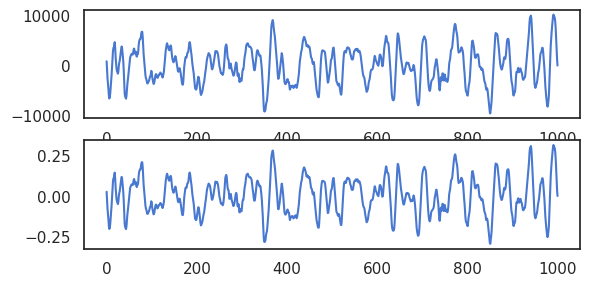

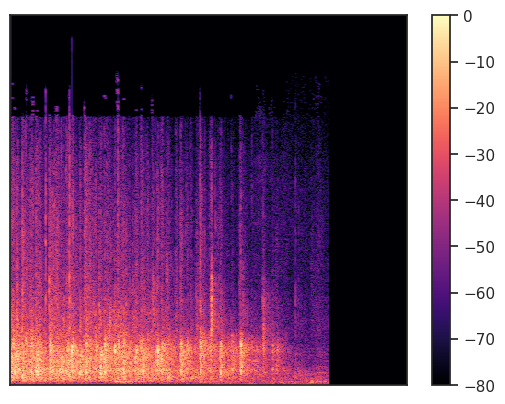

In [37]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa
from scipy.io import wavfile
import seaborn as sb
sb.set(style="white", palette="muted")
import pandas as pd
import IPython.display
import random

os.chdir('/content/data/ESC-50')
audio_files  = os.listdir()
i = random.randint(0,len(audio_files))
clip = audio_files[i]
samplerate, data = wavfile.read(clip) # or alternatively
y,sr = librosa.load(clip,sr=samplerate)
#samplerate * seconds_clip_audio = length_np_array

print(clip)
print(samplerate)
print(type(data))
print(np.shape(data))
print('')
print(sr)
print(type(y))
print(np.shape(y))


display(IPython.display.Audio(data = data, rate=samplerate)  )
display(IPython.display.Audio(data = y, rate=samplerate)  )
plt.subplot(3,1,1)
plt.plot(data[:1000])
plt.subplot(3,1,2)
plt.plot(y[:1000])

fig, ax = plt.subplots()
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img = librosa.display.specshow(data=S_db, sr=sr,ax=ax)
fig.colorbar(img, ax=ax)


os.chdir('/content')

## Auxiliary Classes

In [ ]:

class Clip():
    """A single 5-sec long recording."""
    
    samplerate = 44100   # All recordings in ESC are 44.1 kHz
    frame = 512    # Frame size in samples
    
    def __init__(self, path):
        self.path = path
        y,sr = librosa.load(self.path,sr=samplerate)
        self.raw = y
        

    #cosa vogliamo che faccia la classe che fa il load della singola clip audio?
